In [76]:
import re
import os
import pandas as pd
import numpy as np

In [26]:
file = open("results/webkb_node2vec_avg_128_0.1_0.1.txt",'r')
filestr = file.read()
print(filestr)
file.close()

webkb 128 node2vec 0.1 0.1
Tue Apr 30 12:28:14 2019. At 0 s, node(word) embeddings trained/read from file.
Tue Apr 30 12:28:15 2019. At 1 s, feature matrix generated
Tue Apr 30 12:28:15 2019. At 1 s, svm model trained/read from file

Features shape:(2803, 128)
Accuracy in training set:0.8726364609347128
Macro:(0.8668446693939487, 0.85416989201803, 0.8599125080865548, None)
Micro:(0.8726364609347128, 0.8726364609347128, 0.8726364609347128, None)
              precision    recall  f1-score   support

      course     0.9475    0.9597    0.9535       620
     faculty     0.8405    0.8080    0.8239       750
     project     0.8111    0.7411    0.7745       336
     student     0.8684    0.9079    0.8877      1097

   micro avg     0.8726    0.8726    0.8726      2803
   macro avg     0.8668    0.8542    0.8599      2803
weighted avg     0.8715    0.8726    0.8716      2803

Accuracy in testing set:0.8588825214899714
Macro test:(0.8525356503442629, 0.8338829685099847, 0.8419283511889786, N

In [11]:
files = []
for file in os.listdir("results/"):
    if file.startswith("webkb"):
        print(file)
        files.append(file)

webkb_node2vec_avg_128_0.1_10.0.txt
webkb_node2vec_avg_128_10.0_0.1.txt
webkb_node2vec_avg_128_10.0_3.0.txt
webkb_node2vec_avg_128_0.1_1.0.txt
webkb_node2vec_avg_128_0.1_0.1.txt
webkb_node2vec_avg_128_3.0_10.0.txt
webkb_node2vec_avg_128_3.0_1.0.txt
webkb_node2vec_avg_128_0.3_3.0.txt
webkb_node2vec_avg_128_0.3_0.1.txt
webkb_node2vec_avg_128_1.0_0.1.txt
webkb_node2vec_avg_128_3.0_3.0.txt
webkb_node2vec_avg_128_0.3_0.3.txt
webkb_node2vec_avg_128_1.0_10.0.txt
webkb_node2vec_avg_128_0.1_0.3.txt
webkb_node2vec_avg_128_0.1_3.0.txt
webkb_node2vec_avg_128_3.0_0.3.txt
webkb_node2vec_avg_128_3.0_0.1.txt
webkb_node2vec_avg_128_0.3_1.0.txt
webkb_node2vec_avg_128_10.0_1.0.txt
webkb_node2vec_avg_128_0.3_10.0.txt
webkb_node2vec_avg_128_1.0_1.0.txt
webkb_node2vec_avg_128_1.0_0.3.txt
webkb_node2vec_avg_128_10.0_0.3.txt
webkb_node2vec_avg_128_10.0_10.0.txt
webkb_node2vec_avg_128_1.0_3.0.txt


In [12]:
len(files)

25

In [58]:
matches = [re.match("webkb_node2vec_avg_128_(.*)_(.*).txt", file) for file in files]

p = [float(match.group(1)) for match in matches]
q = [float(match.group(2)) for match in matches]

In [24]:
for file in files:
    result = open("results/webkb_node2vec_avg_128_0.1_0.1.txt",'r').read()
    macro = re.search(""
    f.close()

[0.1,
 10.0,
 10.0,
 0.1,
 0.1,
 3.0,
 3.0,
 0.3,
 0.3,
 1.0,
 3.0,
 0.3,
 1.0,
 0.1,
 0.1,
 3.0,
 3.0,
 0.3,
 10.0,
 0.3,
 1.0,
 1.0,
 10.0,
 10.0,
 1.0]

In [34]:
pattern = r"Accuracy in training set:(.*)\nMacro:\(.*, .*, (.*), None\)\nMicro:\(.*, .*, (.*), None\)"
match = re.search(pattern,filestr)

In [43]:
matches = []
for file in files:
    with open("results/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
train_acc = [float(match.group(1)) for match in matches]
train_macro_f1 = [float(match.group(2)) for match in matches]
train_micro_f1 = [float(match.group(3)) for match in matches]

In [50]:
pattern = r"Accuracy in testing set:(.*)\nMacro test:\(.*, .*, (.*), None\)\nMicro test:\(.*, .*, (.*), None\)"
match = re.search(pattern,filestr)

matches = []
for file in files:
    with open("results/"+file, 'r') as f:
        matches.append(re.search(pattern, f.read()))
acc = [float(match.group(1)) for match in matches]
macro_f1 = [float(match.group(2)) for match in matches]
micro_f1 = [float(match.group(3)) for match in matches]

In [82]:
d = {"p":p, "q":q, "acc":acc, "macro_f1":macro_f1, "micro_f1":micro_f1, "train_acc":train_acc, "train_macro_f1":train_macro_f1, "train_micro_f1":train_micro_f1}
df = pd.DataFrame(d)
# df.p = np.log(df.p)+3
# df.q = np.log(df.q)+3
df

,p,q,acc,macro_f1,micro_f1,train_acc,train_macro_f1,train_micro_f1
0,0.1,10.0,0.851003,0.838276,0.851003,0.877988,0.865553,0.877988
1,10.0,0.1,0.852436,0.837789,0.852436,0.880128,0.868331,0.880128
2,10.0,3.0,0.868911,0.856146,0.868911,0.878345,0.866617,0.878345
3,0.1,1.0,0.858883,0.844541,0.858883,0.885480,0.875186,0.885480
4,0.1,0.1,0.858883,0.841928,0.858883,0.872636,0.859913,0.872636
5,3.0,10.0,0.848854,0.831060,0.848854,0.872636,0.860819,0.872636
6,3.0,1.0,0.840974,0.819245,0.840974,0.881199,0.868710,0.881199
7,0.3,3.0,0.856017,0.846072,0.856017,0.895469,0.889562,0.895469
8,0.3,0.1,0.853152,0.835056,0.853152,0.878701,0.868575,0.878701
9,1.0,0.1,0.850287,0.829767,0.850287,0.870139,0.857463,0.870139


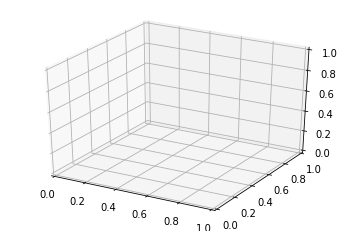

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [67]:
ax.scatter(df.p, df.q, df.acc)

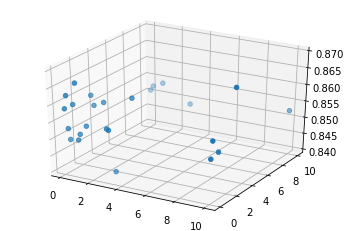

In [70]:
fig

In [71]:
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt


def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, numberOfContourLines, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def ScatterPlot(data):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = Axes3D(f)
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    axes.scatter(x_data, y_data, z_data)

    axes.set_title('Scatter Plot (click-drag with mouse)')
    axes.set_xlabel('X Data')
    axes.set_ylabel('Y Data')
    axes.set_zlabel('Z Data')

    plt.show()
    plt.close('all') # clean up after using pyplot or else thaere can be memory and process problems


def func(data, a, alpha, beta):
    x = data[0]
    y = data[1]
    return a * (x**alpha) * (y**beta)

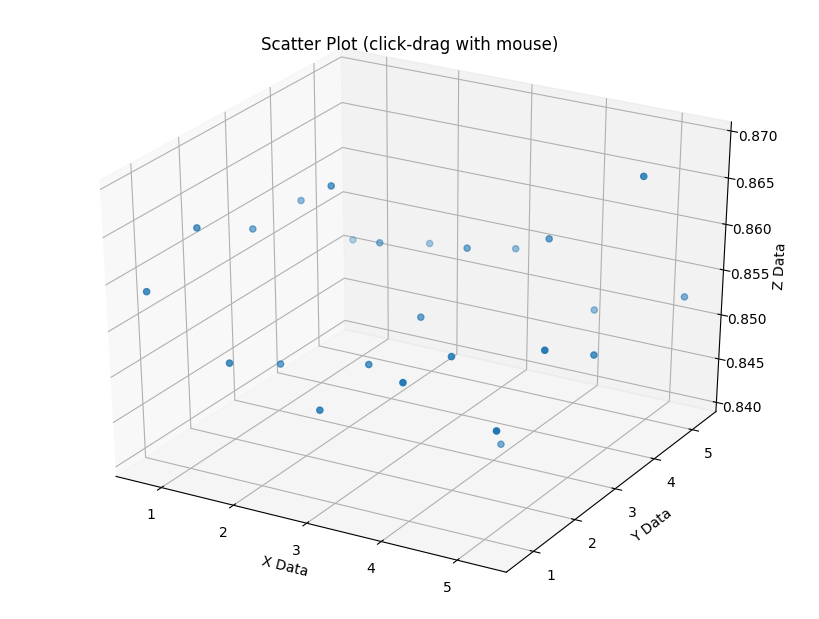

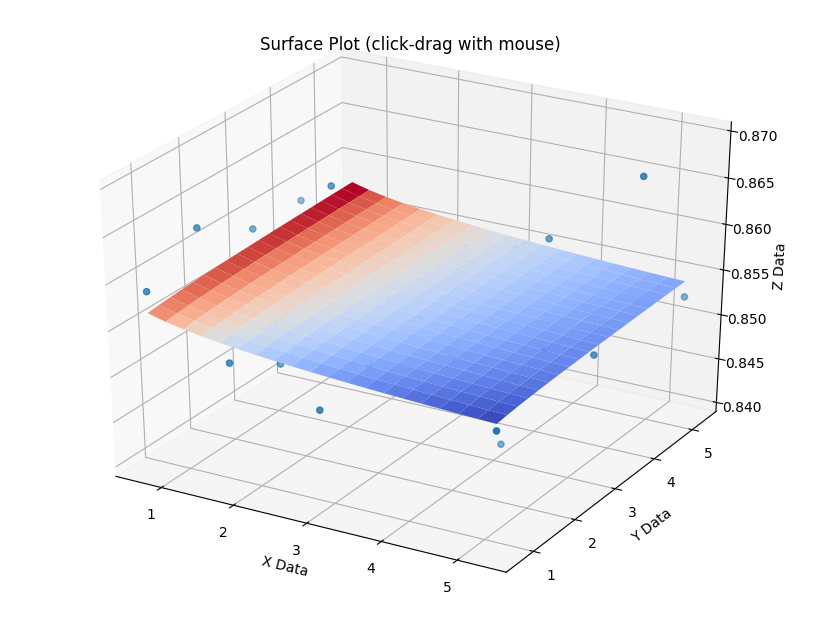

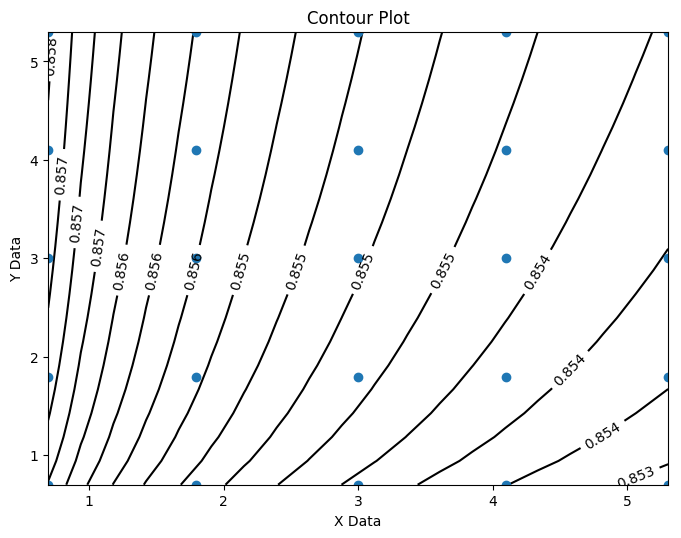

In [81]:
data = [df.p, df.q, df.acc]
initialParameters = [1.0, 1.0, 1.0]
graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16
fittedParameters, pcov = scipy.optimize.curve_fit(func, [df.p, df.q], df.acc, p0 = initialParameters)
ScatterPlot(data)
SurfacePlot(func, data, fittedParameters)
ContourPlot(func, data, fittedParameters)

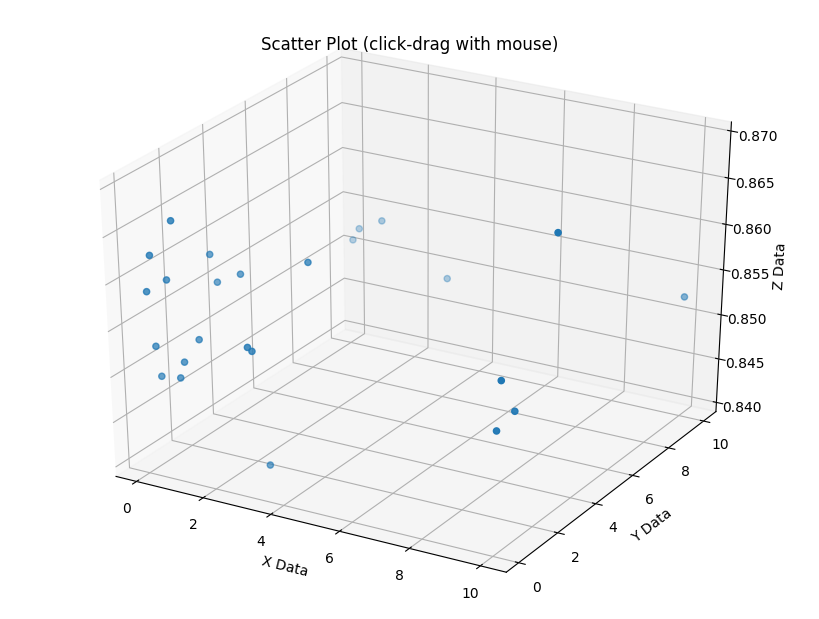

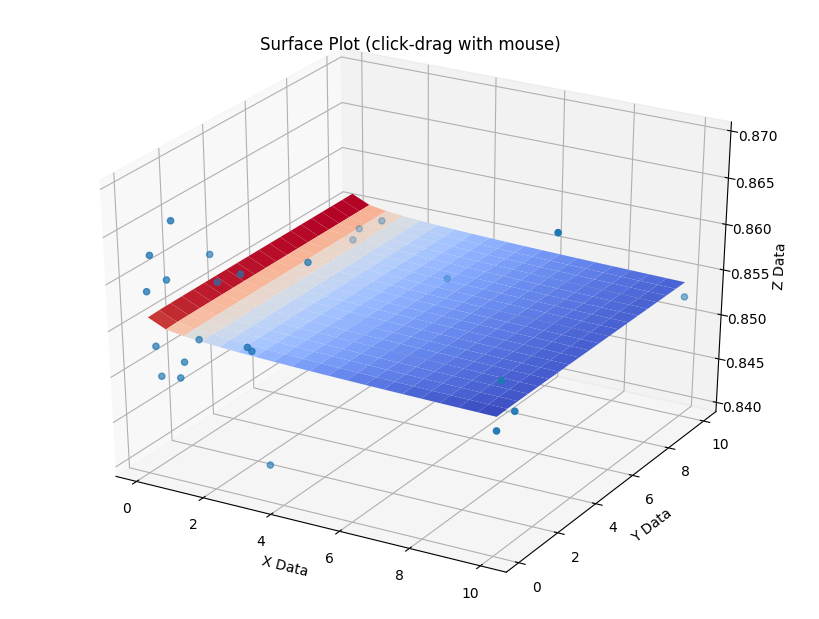

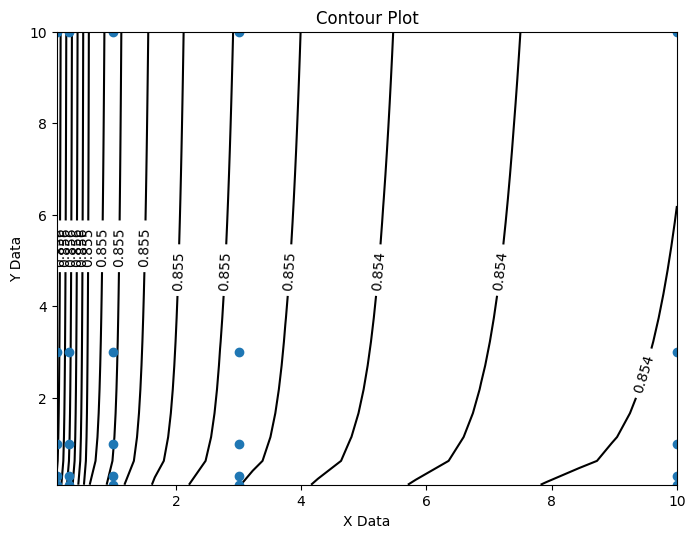

In [83]:
data = [df.p, df.q, df.acc]
initialParameters = [1.0, 1.0, 1.0]
graphWidth = 800 # units are pixels
graphHeight = 600 # units are pixels

# 3D contour plot lines
numberOfContourLines = 16
fittedParameters, pcov = scipy.optimize.curve_fit(func, [df.p, df.q], df.acc, p0 = initialParameters)
ScatterPlot(data)
SurfacePlot(func, data, fittedParameters)
ContourPlot(func, data, fittedParameters)

In [84]:
df.describe()

,p,q,acc,macro_f1,micro_f1,train_acc,train_macro_f1,train_micro_f1
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2.880000,2.880000,0.855100,0.839417,0.855100,0.880913,0.870040,0.880913
std,3.781204,3.781204,0.005725,0.007998,0.005725,0.007319,0.009256,0.007319
min,0.100000,0.100000,0.840974,0.819245,0.840974,0.867285,0.851782,0.867285
25%,0.300000,0.300000,0.852436,0.833382,0.852436,0.876204,0.863779,0.876204
50%,1.000000,1.000000,0.853868,0.840022,0.853868,0.880128,0.868575,0.880128
75%,3.000000,3.000000,0.858883,0.843830,0.858883,0.886550,0.875186,0.886550
max,10.000000,10.000000,0.868911,0.856146,0.868911,0.895469,0.889562,0.895469


In [85]:
df['micro_f1'].argmax()

/home/sunxiaoyu/anaconda3/envs/TCuWE/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


2

In [96]:
df.sort_values(by=['acc'], ascending=False)

,p,q,acc,macro_f1,micro_f1,train_acc,train_macro_f1,train_micro_f1
2,10.0,3.0,0.868911,0.856146,0.868911,0.878345,0.866617,0.878345
17,0.3,1.0,0.865330,0.853171,0.865330,0.891545,0.884301,0.891545
13,0.1,0.3,0.862464,0.850220,0.862464,0.886550,0.873766,0.886550
10,3.0,3.0,0.860315,0.842346,0.860315,0.882983,0.872894,0.882983
3,0.1,1.0,0.858883,0.844541,0.858883,0.885480,0.875186,0.885480
4,0.1,0.1,0.858883,0.841928,0.858883,0.872636,0.859913,0.872636
14,0.1,3.0,0.858883,0.843276,0.858883,0.888334,0.882031,0.888334
24,1.0,3.0,0.857450,0.845081,0.857450,0.877631,0.866059,0.877631
22,10.0,0.3,0.857450,0.841200,0.857450,0.887620,0.879923,0.887620
7,0.3,3.0,0.856017,0.846072,0.856017,0.895469,0.889562,0.895469


In [98]:
df.p == 0.3 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8      True
9     False
10    False
11     True
12    False
13    False
14    False
15    False
16    False
17     True
18    False
19     True
20    False
21    False
22    False
23    False
24    False
Name: p, dtype: bool